In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
from keras import losses, metrics
import numpy as np
import os
import random
import re
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from PIL import Image

TensorFlow 1.x selected.
1.15.2


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_PATH = '/root/real_eyes_dir/'
gdrive_path = '/content/drive/My Drive/Data_Set'
FRAME_PATH = gdrive_path + '/images/'
MASK_PATH = gdrive_path + '/masks/'

folders = ['train_frames', 'train_masks', 'val_frames', 'val_masks']

try:
  for folder in folders:
    os.makedirs(DATA_PATH + folder)
except:
  pass
# Get all frames and masks, sort them, shuffle them to genrate data sets

all_frames = os.listdir(FRAME_PATH)
all_masks = os.listdir(MASK_PATH)

all_frames.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])
all_masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])

random.seed(230)
random.shuffle(all_frames)

# Generate train, val, and test sets for frames

train_split = int(0.7*len(all_frames))

train_frames = all_frames[:train_split]
val_frames = all_frames[train_split:]

# Generate corresponding mask lists for masks

train_masks = [f for f in all_masks if f in train_frames]
val_masks = [f for f in all_masks if f in val_frames]


In [ ]:
def add_frames(dir_name, image):
  
  img = Image.open(FRAME_PATH+image)
  img = img.resize((224,224))
  img.save(DATA_PATH+'/{}'.format(dir_name)+'/'+image)
  
  
  
def add_masks(dir_name, image):
  
  img = Image.open(MASK_PATH+image)
  img = img.resize((224,224))
  img.save(DATA_PATH+'/{}'.format(dir_name)+'/'+image)

In [ ]:
frame_folders = [(train_frames, 'train_frames'), (val_frames, 'val_frames')]
mask_folders = [(train_masks, 'train_masks'), (val_masks, 'val_masks')]

# Add frames

for folder in frame_folders:
  
  array = folder[0]
  name = [folder[1]] * len(array)

  list(map(add_frames, name, array))
         
    
# Add masks

for folder in mask_folders:
  
  array = folder[0]
  name = [folder[1]] * len(array)
  
  list(map(add_masks, name, array))

In [ ]:
def unet(pretrained_weights = None,input_size = (224,224,3)):
  inputs = Input(input_size, dtype = 'float32')
  conv1 = Conv2D(4, 3, activation='relu', padding='same',kernel_initializer = 'he_normal')(inputs)
  conv1 = Dropout(0.3)(conv1)
  conv1 = Conv2D(4, 3, activation='relu', padding='same',kernel_initializer = 'he_normal')(conv1)
  pool1 = MaxPooling2D(pool_size = (2, 2))(conv1)
  conv2 = Conv2D(8, 3, activation='relu', padding='same',kernel_initializer = 'he_normal')(pool1)
  conv2 = Dropout(0.3)(conv2)
  conv2 = Conv2D(8, 3, activation='relu', padding='same',kernel_initializer = 'he_normal')(conv2)
  pool2 = MaxPooling2D(pool_size = (2, 2))(conv2)
  conv3 = Conv2D(16, 3, activation='relu', padding='same',kernel_initializer = 'he_normal')(pool2)
  conv3 = Dropout(0.3)(conv3)
  conv3 = Conv2D(16, 3, activation='relu', padding='same',kernel_initializer = 'he_normal')(conv3)
  up1 = concatenate([conv2,UpSampling2D((2, 2))(
        conv3)], axis=3)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  conv4 = Conv2D(8, 3, activation='relu', padding='same',kernel_initializer = 'he_normal')(up1)
  conv4 = Dropout(0.3)(conv4)
  conv4 = Conv2D(8, 3, activation='relu', padding='same',kernel_initializer = 'he_normal')(conv4)
  up2 = concatenate([conv1,UpSampling2D((2, 2))(
        conv4)], axis=3)
  conv5 = Conv2D(4, 3, activation='relu', padding='same',kernel_initializer = 'he_normal')(up2)
  conv5 = Dropout(0.3)(conv5)
  conv5 = Conv2D(4, 3, activation='relu', padding='same',kernel_initializer = 'he_normal')(conv5)
  conv5 = Conv2D(1, 1, activation = 'sigmoid')(conv5)

    # inputs = Input(input_size,dtype = 'float32')
    # conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    # conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    # pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    # conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    # conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    # pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    # conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    # conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    # pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    # conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    # conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    # drop4 = Dropout(0.5)(conv4)
    # pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    # conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    # drop5 = Dropout(0.5)(conv5)

    # up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    # merge6 = concatenate([drop4,up6], axis = 3)
    # conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    # conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    # up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    # merge7 = concatenate([conv3,up7], axis = 3)
    # conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    # conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    # up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    # merge8 = concatenate([conv2,up8], axis = 3)
    # conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    # conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    # up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    # merge9 = concatenate([conv1,up9], axis = 3)
    # conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    # conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    # conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    # conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

  model = Model(inputs = inputs, outputs = conv5)

  model.compile(optimizer = Adam(lr=1E-6, beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
  model.summary()

  if(pretrained_weights):
    model.load_weights(pretrained_weights)

  return model

In [ ]:
!pip install -q git+https://github.com/tensorflow/examples.git
from tensorflow_examples.models.pix2pix import pix2pix

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

def unet_model(output_channels):
  inputs = tf.keras.layers.Input(shape=(224, 224, 3),dtype = 'float32')
  x = inputs

  # Downsampling through the model
  skips = down_stack(x)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

model = unet_model(1)
model.compile(optimizer = Adam(lr=1E-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
import cv2

def data_gen(img_folder, mask_folder, batch_size):
  c = 0
  n = os.listdir(img_folder) #List of training images
  random.shuffle(n)
  
  while (True):
    img = np.zeros((batch_size, 224,224, 3)).astype('float32')
    mask = np.zeros((batch_size, 224,224, 1)).astype('float32')

    for i in range(c, c+batch_size): #initially from 0 to 16, c = 0. 

      train_img = cv2.imread(img_folder+'/'+n[i]).astype('float32')/255.0
      
      img[i-c] = train_img #add to array - img[0], img[1], and so on.
                                                   

      train_mask = cv2.imread(mask_folder+'/'+n[i], cv2.IMREAD_GRAYSCALE).astype('float32')/255.
      train_mask = train_mask.reshape(224,224, 1) # Add extra dimension for parity with train_img size [512 * 512 * 3]

      mask[i-c] = train_mask

    c+=batch_size
    if(c+batch_size>=len(os.listdir(img_folder))):
      c=0
      random.shuffle(n)
                  # print "randomizing again"
    yield img, mask

train_frame_path = '/root/real_eyes_dir/train_frames'
train_mask_path = '/root/real_eyes_dir/train_masks'

val_frame_path = '/root/real_eyes_dir/val_frames'
val_mask_path = '/root/real_eyes_dir/val_masks'

# Train the model
train_gen = data_gen(train_frame_path,train_mask_path, batch_size = 1)
val_gen = data_gen(val_frame_path,val_mask_path, batch_size = 1)

In [ ]:
NO_OF_TRAINING_IMAGES = len(os.listdir(DATA_PATH + '/train_frames/'))
NO_OF_VAL_IMAGES = len(os.listdir(DATA_PATH + '/val_frames/'))

NO_OF_EPOCHS = 10

BATCH_SIZE = 1

weights_path = gdrive_path +'/Model.h5'
m = unet()
model_checkpoint = ModelCheckpoint(weights_path, monitor='loss',verbose=1, save_best_only=True)
csv_logger = CSVLogger(gdrive_path + '/log.out', append=True, separator=';')
callbacks_list = [model_checkpoint, csv_logger]

results = m.fit(train_gen, epochs=NO_OF_EPOCHS, 
                          steps_per_epoch = (NO_OF_TRAINING_IMAGES//BATCH_SIZE),
                          validation_data=val_gen, 
                          validation_steps=(NO_OF_VAL_IMAGES//BATCH_SIZE), 
                          callbacks=callbacks_list)
m.save(weights_path)


NameError: ignored

In [ ]:
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file(gdrive_path +'/Model.h5')
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

# Save the model.
with open('/content/model.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 22 variables.
INFO:tensorflow:Converted 22 variables to const ops.


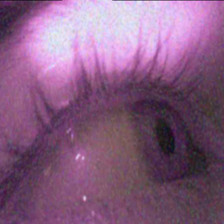

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

test = cv2.imread('/root/real_eyes_dir/val_frames/10029.png')
cv2_imshow(test)

In [ ]:
def labelVisualize(num_class,color_dict,img):
    img = img[:,:,0] if len(img.shape) == 3 else img
    img_out = np.zeros(img.shape + (3,))
    for i in range(num_class):
        img_out[img == i,:] = color_dict[i]
    return img_out / 255


def saveResult(save_path,npyfile,flag_multi_class = False,num_class = 2):
    for i,item in enumerate(npyfile):
        img = labelVisualize(num_class,COLOR_DICT,item) if flag_multi_class else item[:,:,0]
        io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)

In [ ]:
from keras.preprocessing.image import *
import matplotlib.pyplot as plt
import skimage.io as io

test_image = cv2.imread('/root/real_eyes_dir/val_frames/10029.png').astype('float32')
test_image = test_image/255.0
test_image = np.expand_dims(test_image, axis=0)

label_image = Image.open('/root/real_eyes_dir/val_frames/10029.png')
label_image = img_to_array(label_image)

model = m
model.load_weights('/content/drive/My Drive/Data_Set_15_09_2020_12_08_03/Model2.h5')
results = model.predict(test_image,batch_size = 1,verbose=1)
saveResult("/root/real_eyes_dir",results)

ValueError: ignored